<div><h1 style="font-size:18pt; color: Green"><b>IPL's Top Batsmen:</b></h1><p style="font-size:18pt; color: Green"> Cluster Analysis of Player Performance using Ball-by-Ball Dataset - Assignment</p></div>

<img src="https://m.economictimes.com/thumb/msid-107073116,width-1200,height-1200,resizemode-4,imgsize-28828/ipl-2024.jpg"  style="width:400px; height: 400px"> 

## Problem Statement:
Now that this year's IPL auction is over, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset. It contains the ball by ball dataset. So, stop thinking and start analyzing.

Create clusters of IPL batsmen based on their strengths in order to show some of the best IPL batsmen of all time.

## Data Description:
- **id:** Unique Match ID as per ESPNCricinfo.
- **inning:** Inning Number.
- **over:** Over Number.
- **ball:** Ball Number.
- **batsman:** Batsman on strike.
- **non_striker:** Batsman at non-striker.
- **bowler:** Bowler.
- **batsman_runs:** Runs off bat.
- **extra_runs:** Extra runs.
- **total_runs:** Total Runs.
- **non_boundary:** If there are overthrows.
- **is_wicket:** Is the delivery a wicket?.
- **dismissal_kind:** Type of dismissal.
- **player_dismissed:** Player who got dismissed.
- **fielder:** Fielder involved in the dismissal.
- **extras_type:** Type of extras.
- **batting_team:** Batting team.
- **bowling_team:** Bowling team.

## Tasks/Activities List:
Your code should contain the following activities/Analysis:
- Read the IPL dataset.
- Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.
- Analyze the data.
- Generate all the relevant features to represent a batsman like total runs scored, strike rate, etc.
- Apply all the different clustering algorithms on this batsmen dataset like Kmeans, DBSCAN and Hierarchical clustering algorithms.
- Evaluate the clustering results using a performance metric.
- Visualize the clustered dataset.

## Success Metrics:
Below are the metrics for the successful submission of this case study:
The cluster with the best IPL players of all time must have players who played atleast 100 matches and scored > 2500 runs.

<a id="table_content"></a>

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics of Numeric Features](#3.1)**
   - **[3.2: Summary Statistics of Categorical Features](#3.2)**
- **[4: EDA](#eda)**
   - **[4.1: Top 5 Highest Scoring Teams](#4.1)**
   - **[4.2: Top 10 Batsmen in IPL - Seasons 2008-2020](#4.2)**
   - **[4.3: Top 10 High Wicket-Taking Bowlers](#4.3)**
   - **[4.4: Top 10 Best Fielders](#4.4)**
- **[5: Data Cleaning](#5)**
   - **[5.1: Handling Repeated and similar data](#5.1)**
   - **[5.2: Handling Null/Empty values](#5.2)**
       - **[5.2.1: handling Dismissal_Kind column](#5.2.1)**
       - **[5.2.2: handling player_dismissed column](#5.2.2)**
       - **[5.2.3: handling fielder column](#5.2.3)**
       - **[5.2.4: handling bowling_team column](#5.2.4)**
   - **[5.3: Handle Noisy Data](#5.3)**
   - **[5.4: Outlier Treatment](#5.4)**
   - **[5.5: Check Imbalanced Data](#5.5)**
   - **[5.6: Split the Dataset](#5.6)**
- **[6:Feature ENG - Generate relevant features w.r.t Batsman](#6)**
- **[7: Outlier Detection and treatment](#7)**
- **[8: Feature Scaling](#8)**
- **[9: K-Means Clustering](#9)**
   - **[9.1: Elbow Method](#9.1)**
   - **[9.2: Silhouette Method](#9.2)**
   - **[9.3: Clustering Model - K-means](#9.3)**
   - **[9.4: Evaluation Metrics](#9.4)**
   - **[9.5: Vizualisation](#9.5)**
       - **[9.5.1: Radar Chart Approach](#9.5.1)**
       - **[9.5.2: Histogram Chart Approach](#9.5.2)**
- **[10 : Hierarchical clustering](#10)**
   - **[10.1: Dendrogram Plot](#10.1)**
   - **[10.2: Clustering Model - Hierarchical](#10.2)**
   - **[10.3: Evaluation Metrics](#10.3)**
   - **[10.4: Visualization](#10.4)**
       - **[10.4.1: Radar Chart Approach](#10.4.1)**
       - **[10.4.2: Histogram Chart Approach](#10.4.2)**
- **[11 : DBSCAN](#11)**
   - **[11.1: Finding Best Parameters](#11.1)**
   - **[11.2: Clustering Model - DBSCAN](#11.2)**
   - **[11.3: Evaluation Metrics](#11.3)**
   - **[11.4: Visualization](#11.4)**
       - **[11.4.1: Radar Chart Approach](#11.4.1)**
       - **[11.4.2: Histogram Chart Approach](#11.4.2)**
- **[12: Conclusion](#12)**
 
 
   


# 1: Import Libraries
<a id="1"></a>
 ⬆️[Table Contents](#table_content)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from tabulate import tabulate

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.cluster import DBSCAN 

%matplotlib inline

# 2: Read Dataset
<a id="2"></a>
 ⬆️[Table Contents](#table_content)

In [2]:
ipl_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
pd.set_option('display.max_rows', 50)

In [4]:
ipl_df.head(50)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
ipl_df['bowling_team'].nunique()

15

# 3: Dataset Overview
<a id="3"></a>
 ⬆️[Table Contents](#table_content)

In [6]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

<div style="background-color: Green;border: 2px solid #4d94ff; padding: 10px; border-radius: 10px;">
  <h3>Inference:</h3>
  <p>The provided DataFrame contains cricket match data with 193,468 entries and 18 columns.</p>
  <ul>
    <li><strong>Numeric Features:</strong> There are 9 numeric columns, including variables such as inning, over, ball, batsman_runs, extra_runs, total_runs, non_boundary, and is_wicket. These features appear to capture various aspects of the game's progress and outcomes.</li>
    <li><strong>Categorical Features:</strong> There are 9 categorical columns, including batsman, non_striker, bowler, dismissal_kind, player_dismissed, fielder, extras_type, batting_team, and bowling_team. These features represent players involved in the match, dismissal types, and team names.</li>
    <li><strong>Missing Values:</strong> Some columns, such as dismissal_kind, player_dismissed, fielder, and extras_type, have a significant number of missing values. These missing values may require handling before further analysis or modeling.</li>
    <li><strong>Data Types:</strong> The DataFrame contains a mixture of integer and object (string) data types, indicating both numeric and categorical variables. Proper data type handling may be necessary for data preprocessing and analysis.</li>
      <li><strong>Semantic Clarity:</strong> The column'<b>id</b>' is generic and doesn't convey any specific meaning about the data it represents. However, renaming it to '<b>match_id</b>' makes it clear that this column contains unique identifiers for individual matches in the IPL dataset.</li>
      
  </ul>
</div>


In [7]:
# Rename 'id' to 'match_id'
ipl_df.rename(columns={'id': 'match_id'}, inplace=True)

## 3.1: Summary statistics for Numeric Features
<a id="3.1"></a>
 ⬆️[Table Contents](#table_content)

In [8]:
ipl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


<div style="background-color: Green;border: 2px solid #4d94ff; padding: 10px; border-radius: 10px;">
  <h3>Inference:</h3>

  <ul>
    <li><strong>Match Characteristics:</strong><br> The dataset comprises 193,468 match events, with an average match ID of 756,768. Match events include information such as inning number, over number, ball number, and match-specific details.</li>
      <li><strong>Scoring Patterns:</strong><br> On average, teams score about <b>1.31 runs per ball</b>, with <b>1.24 runs coming from the batsman's bat</b> and <b>0.07 extra runs</b>. The maximum number of runs scored off a single ball is 7, indicating instances of boundaries and overthrows.</li>
    <li><strong>Wicket Taking:</strong><br> About <b>4.91%</b> of deliveries result in a wicket. This suggests that wickets are relatively infrequent occurrences in cricket matches, with teams aiming to preserve wickets while maximizing runs.</li>
    <li><strong>Data Completeness:</strong><br> Some columns, such as dismissal_kind, player_dismissed, and fielder, contain a significant number of missing values. Careful handling of these missing values may be necessary to ensure the integrity of the analysis.</li>
 </ul>
</div>


## 3.2: Summary statistics of Categorical Features
<a id="3.2"></a>
 ⬆️[Table Contents](#table_content)

In [9]:
ipl_df.describe(include="object")

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,9495,9495,6784,10233,193468,193277
unique,537,530,420,9,506,879,5,15,15
top,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,5743,167,164,5858,24466,24453


<div style="background-color: green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
  <ul>
    <li><strong>Batsmen, Bowlers, and Fielders:</strong><br> The dataset includes information on 537 unique batsmen, 420 unique bowlers, and 879 unique fielders. <b>Virat Kohli</b> emerges as the most frequent batsman, followed by Shikhar Dhawan and Rohit Sharma.</li>
    <li><strong>Dismissal Types:</strong><br> The most common dismissal type is "<b>caught</b>," accounting for the majority of dismissals in cricket matches. Other dismissal types include "bowled," "run out," and "lbw," among others.</li>
    <li><strong>Extras:</strong><br> The dataset records five types of extras, with "<b>wides</b>" being the most frequently occurring extra, indicating instances where runs are scored without the batsman making contact with the ball.</li>
    <li><strong>Team Details:</strong><br> There are <b>15</b> unique batting teams and 15 unique bowling teams in the dataset. <b>Mumbai Indians</b> appear as the most frequent team in both batting and bowling, suggesting their prominent presence in IPL matches.</li>
  </ul>
</div>


# 4: EDA
<a id="4"></a>
 ⬆️[Table Contents](#table_content)

## 4.1: Top 5 Highest Scoring Teams
<a id="4.1"></a>
 ⬆️[Table Contents](#table_content)

Top 5 Highest Scoring Teams:
batting_team
Mumbai Indians                 32286
Royal Challengers Bangalore    30214
Kings XI Punjab                30017
Kolkata Knight Riders          29383
Chennai Super Kings            28363
Name: total_runs, dtype: int64 



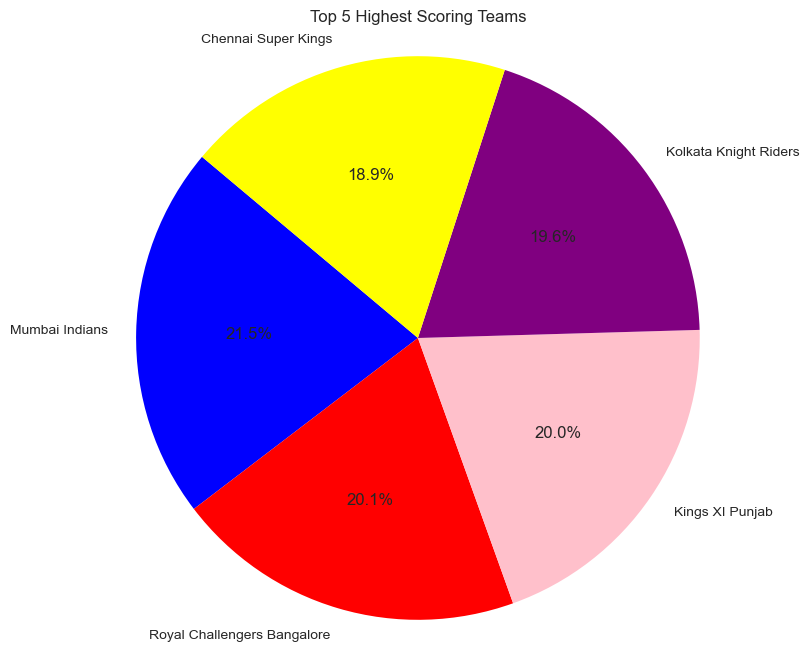

In [10]:
# Group the dataset by the batting team's name
team_stats = ipl_df.groupby('batting_team')

# Calculate the total runs scored by each team
total_runs_by_team = team_stats['total_runs'].sum()

# Sort the teams based on the total runs scored in descending order
top_scoring_teams = total_runs_by_team.sort_values(ascending=False)

# Select the top 5 highest-scoring teams
top_5_teams = top_scoring_teams.head(5)

# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(top_5_teams,"\n")

# Create a pie chart
colors = ['blue', 'red', 'pink', 'purple', 'yellow']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(top_5_teams, labels=top_5_teams.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Highest Scoring Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 4.2: Top 10 Batsmen in IPL - Seasons 2008-2020
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

The Top 10 Batsmen in the Tournament are:
             batsman  Runs
505         V Kohli  5878
438        SK Raina  5368
116       DA Warner  5254
379       RG Sharma  5230
407        S Dhawan  5197
24   AB de Villiers  4849
96         CH Gayle  4772
301        MS Dhoni  4632
398      RV Uthappa  4607
154       G Gambhir  4217


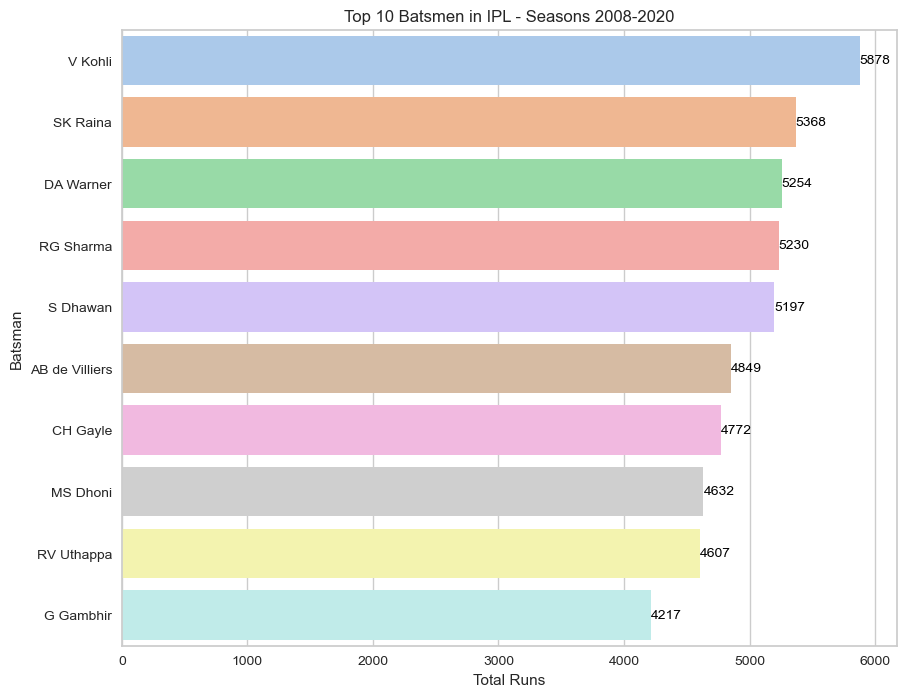

In [11]:
# Group by batsman and calculate total runs
batting_tot = ipl_df.groupby('batsman')['batsman_runs'].sum().reset_index(name='Runs')

# Sort the dataframe by Runs in descending order
batting_sorted = batting_tot.sort_values(by='Runs', ascending=False)

# Select top 10 batsmen
top_batsmen = batting_sorted.head(10)

# Print top 10 batsmen
print('The Top 10 Batsmen in the Tournament are:\n', top_batsmen)

# Plotting

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_batsmen, y='batsman', x='Runs', palette=colors)

# Add annotations
for index, value in enumerate(top_batsmen['Runs']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen in IPL - Seasons 2008-2020')

# Show the plot
plt.show()

## 4.3: Top 10 High Wicket-Taking Bowlers
<a id="4.3"></a>
 ⬆️[Table Contents](#table_content)

Top 10 High Wicket-Taking Bowlers:
bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: is_wicket, dtype: int64


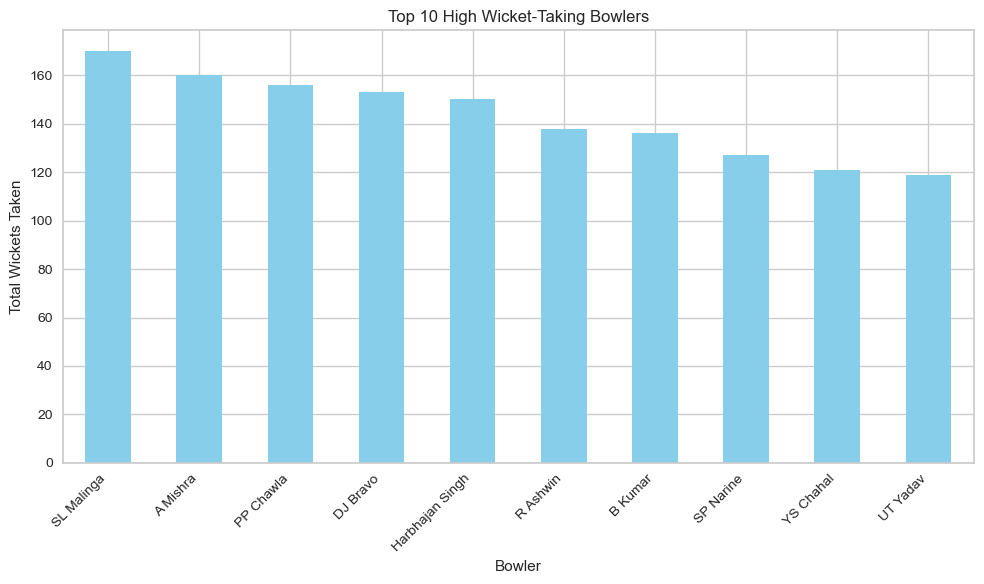

In [12]:
# Filter out the instances where dismissal_kind is 'run out'
filtered_ipl_df = ipl_df[ipl_df['dismissal_kind'] != 'run out']

# Group the filtered dataset by bowler's name
bowler_stats = filtered_ipl_df.groupby('bowler')

# Calculate the total number of wickets taken by each bowler
wickets_taken = bowler_stats['is_wicket'].sum()

# Sort the bowlers based on the number of wickets in descending order
top_bowlers = wickets_taken.sort_values(ascending=False)

# Select the top 10 bowlers
top_10_bowlers = top_bowlers.head(10)

# Display the top 10 bowlers
print("Top 10 High Wicket-Taking Bowlers:")
print(top_10_bowlers)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_bowlers.plot(kind='bar', color='skyblue')
plt.title('Top 10 High Wicket-Taking Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4.4: Top 10 Best Fielders
<a id="4.4"></a>
 ⬆️[Table Contents](#table_content)

Top 10 Best Fielders:
fielder
MS Dhoni          164
KD Karthik        156
RV Uthappa        123
AB de Villiers    117
SK Raina          105
RG Sharma          92
PA Patel           91
KA Pollard         88
V Kohli            83
WP Saha            83
dtype: int64


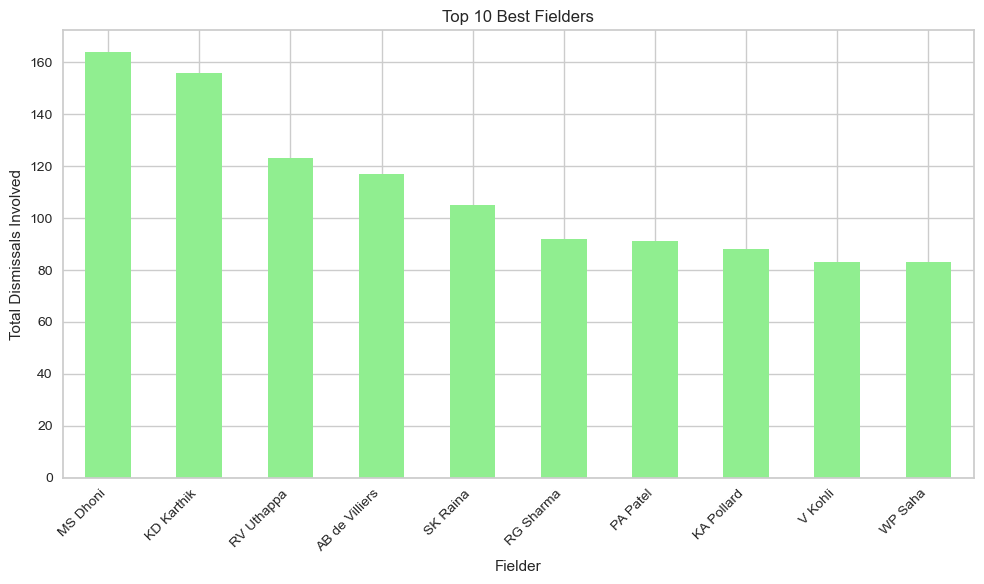

In [13]:
# Filter the dataset to include only instances where a fielder is involved in a dismissal
dismissals_with_fielder = ipl_df[ipl_df['fielder'].notnull()]

# Group the filtered dataset by the fielder's name
fielder_stats = dismissals_with_fielder.groupby('fielder')

# Calculate the total number of dismissals in which each fielder was involved
dismissals_count = fielder_stats.size()

# Sort the fielders based on the number of dismissals in descending order
top_fielders = dismissals_count.sort_values(ascending=False)

# Select the top 5 fielders
top_10_fielders = top_fielders.head(10)

# Display the top 5 fielders
print("Top 10 Best Fielders:")
print(top_10_fielders)


# Plotting
plt.figure(figsize=(10, 6))
top_10_fielders.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Best Fielders')
plt.xlabel('Fielder')
plt.ylabel('Total Dismissals Involved')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5: Data Cleaning
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

## 5.1: Handling Repeated and similar data
<a id="5.1"></a>
 ⬆️[Table Contents](#table_content)

In [14]:
ipl_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
ipl_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [16]:
# Define replacements using a dictionary
team_replacements = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals'
}

# Apply replacements to 'batting_team' and 'bowling_team' columns
ipl_df['batting_team'].replace(team_replacements, inplace=True)
ipl_df['bowling_team'].replace(team_replacements, inplace=True)

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
  <ul>
    <li><b>Rising Pune Supergiants</b> and <b>Rising Pune Supergiant</b> are similar and likely represent the same team. One of them might be a typo or variation in the naming convention.</li>
    <li><b>Delhi Daredevils</b> and <b>Delhi Capitals</b> are similar and likely represent the same team. "Delhi Daredevils" was the former name of the team, which was later changed to "Delhi Capitals".</li>
  </ul>
</div>


## 5.2: Handling Null/Empty values
<a id="5.2"></a>
 ⬆️[Table Contents](#table_content)

In [17]:
# checking for null values 
null = pd.DataFrame({'Null Values' : ipl_df.isna().sum(), 'Percentage Null Values' : (ipl_df.isna().sum()) /len(ipl_df) * (100)})
null

,Null Values,Percentage Null Values
match_id,0,0.000000
inning,0,0.000000
over,0,0.000000
ball,0,0.000000
batsman,0,0.000000
non_striker,0,0.000000
bowler,0,0.000000
batsman_runs,0,0.000000
extra_runs,0,0.000000
total_runs,0,0.000000


### 5.2.1: handling Dismissal_Kind column
<a id="5.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [18]:
ipl_df['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [19]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_dismissal = ipl_df[ipl_df['dismissal_kind'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0:", len(nan_dismissal))

Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0: 183973


In [20]:
# Fill NaN values in 'dismissal_kind' with 'not out'
ipl_df['dismissal_kind'].fillna('not out', inplace=True)

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
  <p>
      The analysis reveals that there are cases where the <b>dismissal_kind</b> column has NaN values while the <b>is_wicket</b> column is zero, indicating that no dismissal occurred. This aligns with the expected behavior, as a NaN value in 'dismissal_kind' implies no dismissal, which is consistent with a 'is_wicket' value of zero.
  </p>
  <p>
      To handle these NaN values, it is appropriate to fill them with a category like "<b>not out</b>" or "<b>no dismissal</b>" to denote that the batsman was not dismissed. This ensures that the missing values are appropriately represented in the dataset and does not affect subsequent analysis.
  </p>
</div>


### 5.2.2: handling player_dismissed column
<a id="5.2.2"></a>
 ⬆️[Table Contents](#table_content)

In [21]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_player_dismissed = ipl_df[ipl_df['player_dismissed'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'player_dismissed' is NaN and 'is_wicket' is 0:", len(nan_player_dismissed))

Number of rows where 'player_dismissed' is NaN and 'is_wicket' is 0: 183973


In [22]:
# Fill missing values in 'player_dismissed' with 'Not Applicable' or any other suitable value
ipl_df['player_dismissed'].fillna('Not Out', inplace=True)

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
    <h3>Inference:</h3>
  <p>Upon inspecting the data, it was discovered that instances where the <b>is_wicket</b> column is zero coincide with missing values in the <b>player_dismissed</b> column. In cricket, when the is_wicket column is zero, it signifies that no player was dismissed during that particular ball.</p>
  <p>To address this, the missing values in the 'player_dismissed' column have been replaced with '<b>Not Out</b>'. This term is commonly used in cricket to indicate that a batsman was not dismissed during their innings.</p>
</div>


### 5.2.3: handling fielder column
<a id="5.2.3"></a>
 ⬆️[Table Contents](#table_content)

In [23]:
ipl_df['fielder'].fillna('Not Applicable', inplace=True)


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>Regarding the <b>fielder</b> column, NaN values indicate that the fielder's name was either not applicable or not recorded for that dismissal event. To represent this, NaN values are replaced with "<b>Not Applicable</b>" to indicate that the fielder's name was not applicable or recorded for that particular dismissal event.</p>
</div>

In [24]:
ipl_df['extras_type'].unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [25]:
ipl_df['extras_type'].fillna('standard', inplace=True)


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
  <p>Considering cricket terminology, when a ball results in no extra runs, it signifies a standard delivery without any specific type of extra. Therefore, for the <b>extras_type></b> column, the appropriate value for such cases would be <strong>"None"</strong> or <strong>"Standard"</strong>. This indicates that the ball did not yield any additional runs beyond those scored by the batsman.</p>
</div>

### 5.2.4: handling bowling_team column
<a id="5.2.4"></a>
 ⬆️[Table Contents](#table_content)

In [26]:
ipl_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

In [27]:
ipl_df.dropna(subset=['bowling_team'],inplace=True)

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>Without sufficient information to accurately impute missing values for the <b>bowling_team</b> column, dropping these rows is a prudent decision. This ensures that subsequent analysis is based on complete and reliable data related to bowling team information.</p>
</div>


# 6: Generate relevant features w.r.t Batsman
<a id="6"></a>
 ⬆️[Table Contents](#table_content)

In [28]:
# Calculate the number of matches played by each batsman
num_matches = ipl_df.groupby('batsman')['match_id'].nunique()

# Calculate the total runs scored by each batsman
total_runs_by_batsman = ipl_df.groupby('batsman')['batsman_runs'].sum()

# Calculate the number of balls faced by each batsman
balls_faced_by_batsman = ipl_df.groupby('batsman')['ball'].count()

# Calculate strike rate for each batsman
strike_rate = (total_runs_by_batsman / balls_faced_by_batsman) * 100

# Calculate the number of sixes hit by each batsman
num_sixes = ipl_df[ipl_df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()

# Calculate the number of fours scored by each batsman
num_fours = ipl_df[ipl_df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()

# Select relevant features for clustering
batsman_data = pd.DataFrame({'matches_played': num_matches,
                             'total_runs': total_runs_by_batsman,
                             'balls_faced': balls_faced_by_batsman,
                             'strike_rate': strike_rate,
                             'sixes': num_sixes,
                             'fours': num_fours})

# Fill NaN values in 'sixes' and 'fours' columns with 0
batsman_data['sixes'] = batsman_data['sixes'].fillna(0)
batsman_data['fours'] = batsman_data['fours'].fillna(0)

In [29]:

batsman_data.reset_index(inplace=True)
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0


In [31]:
batsman_data.columns

Index(['batsman', 'matches_played', 'total_runs', 'balls_faced', 'strike_rate',
       'sixes', 'fours'],
      dtype='object')

In [32]:
batsman_data.shape[0]

537

# 7: Outlier Detection and treatment
<a id="7"></a>
 ⬆️[Table Contents](#table_content)

**Storing the Original Data for DBSCAN Clustering: DBSCAN is Not Sensitive to Outliers** 

In [33]:
batsman_data_cleaned_DBSCAN = batsman_data.copy()

In [34]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
batsman_data['Outlier_Scores'] = model.fit_predict(batsman_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
batsman_data['Is_Outlier'] = [1 if x == -1 else 0 for x in batsman_data['Outlier_Scores']]

# Display the first few rows of the batsman_data dataframe
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,Outlier_Scores,Is_Outlier
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0,1,0
1,A Chandila,2,4,7,57.142857,0.0,0.0,1,0
2,A Chopra,6,53,75,70.666667,0.0,7.0,1,0
3,A Choudhary,3,25,20,125.000000,1.0,1.0,1,0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0,1,0


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named <b>Is_Outlier</b>. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:</p>
</div>


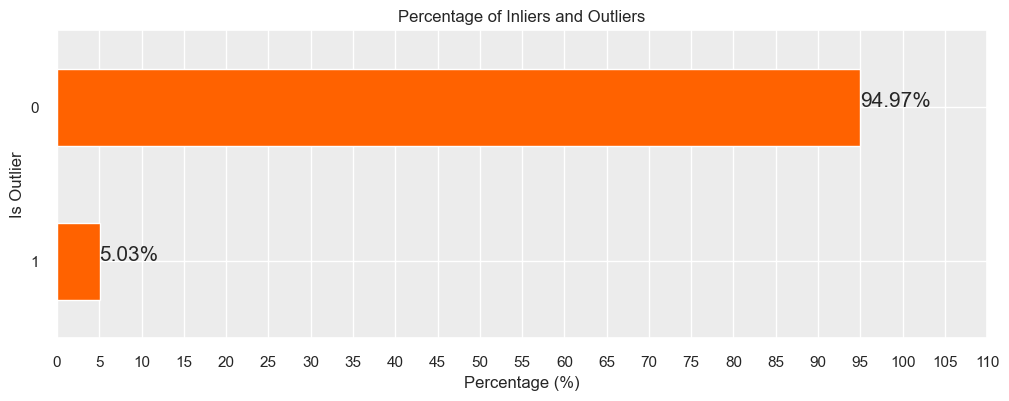

In [35]:
# Calculate the percentage of inliers and outliers
sns.set(style='darkgrid', rc={'axes.facecolor': '#ececec'})

outlier_percentage = batsman_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [36]:
# Getting the number of rows in the cleaned customer dataset
batsman_data.shape[0]

537

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
  <p>From the above plot, it's evident that the dataset contains a small percentage of outliers, approximately 5% of the batsmen.</p>
  
  <ul>
    <li>Given the small size of the dataset and the specific business requirement, we need to carefully consider the impact of outliers on our analysis.</li>
    <li>Removing outliers might enhance the quality of our model and improve its ability to capture meaningful patterns. However, we risk losing valuable information, especially regarding <b>top-performing batsmen</b>.</li>
  </ul>

  <p>Considering the importance of retaining information about top-performing batsmen and the potential loss of valuable insights, we have decided not to remove the outliers.</p>
</div>


In [37]:
batsman_data.drop(columns=['Outlier_Scores', 'Is_Outlier'], axis=1, inplace=True)

In [38]:
batsman_data_cleaned = batsman_data.copy()

In [39]:
batsman_data_cleaned

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0
...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.918033,3.0,26.0
533,Yashpal Singh,4,47,67,70.149254,0.0,5.0
534,Younis Khan,1,3,7,42.857143,0.0,0.0
535,Yuvraj Singh,126,2750,2205,124.716553,149.0,217.0


In [40]:
batsman_data_cleaned.isnull().sum()

batsman           0
matches_played    0
total_runs        0
balls_faced       0
strike_rate       0
sixes             0
fours             0
dtype: int64

# 8: Feature Scaling
<a id="8"></a>
 ⬆️[Table Contents](#table_content)

In [41]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['batsman']

# List of columns that need to be scaled
columns_to_scale = batsman_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
batsman_data_scaled = batsman_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
batsman_data_scaled[columns_to_scale] = scaler.fit_transform(batsman_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
batsman_data_scaled.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


# 9: K-Means Clustering
<a id="9"></a>
 ⬆️[Table Contents](#table_content)

## 9.1: Elbow Method
<a id="9.1"></a>
 ⬆️[Table Contents](#table_content)

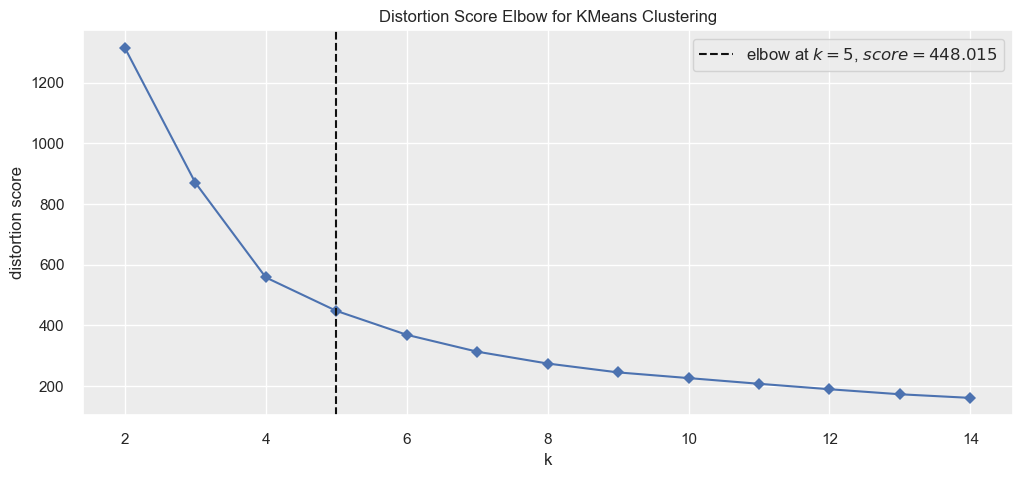

In [42]:
# Set the color palette for the plot
# sns.set_palette(['#0041c2'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(batsman_data_scaled.iloc[:,1:])

# Finalize and render the figure
visualizer.show();

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>The optimal k value, suggested by the <b>Elbow Method</b> using the YellowBrick library, is <b>5</b>. However, due to the absence of a distinct elbow point, the inertia decreases continuously up to k=5, indicating that the optimum k may be between 3 and 7. To refine the selection, we can use <b>silhouette analysis</b> and consider business insights for a practical k value.
</p>
</div>

## 9.2: Silhouette Method
<a id="9.2"></a>
 ⬆️[Table Contents](#table_content)

In [43]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15,16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
#     sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
        
        
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='top', 
             horizontalalignment='left', bbox=dict(facecolor='#FFffff', edgecolor='red', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)
        
         # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

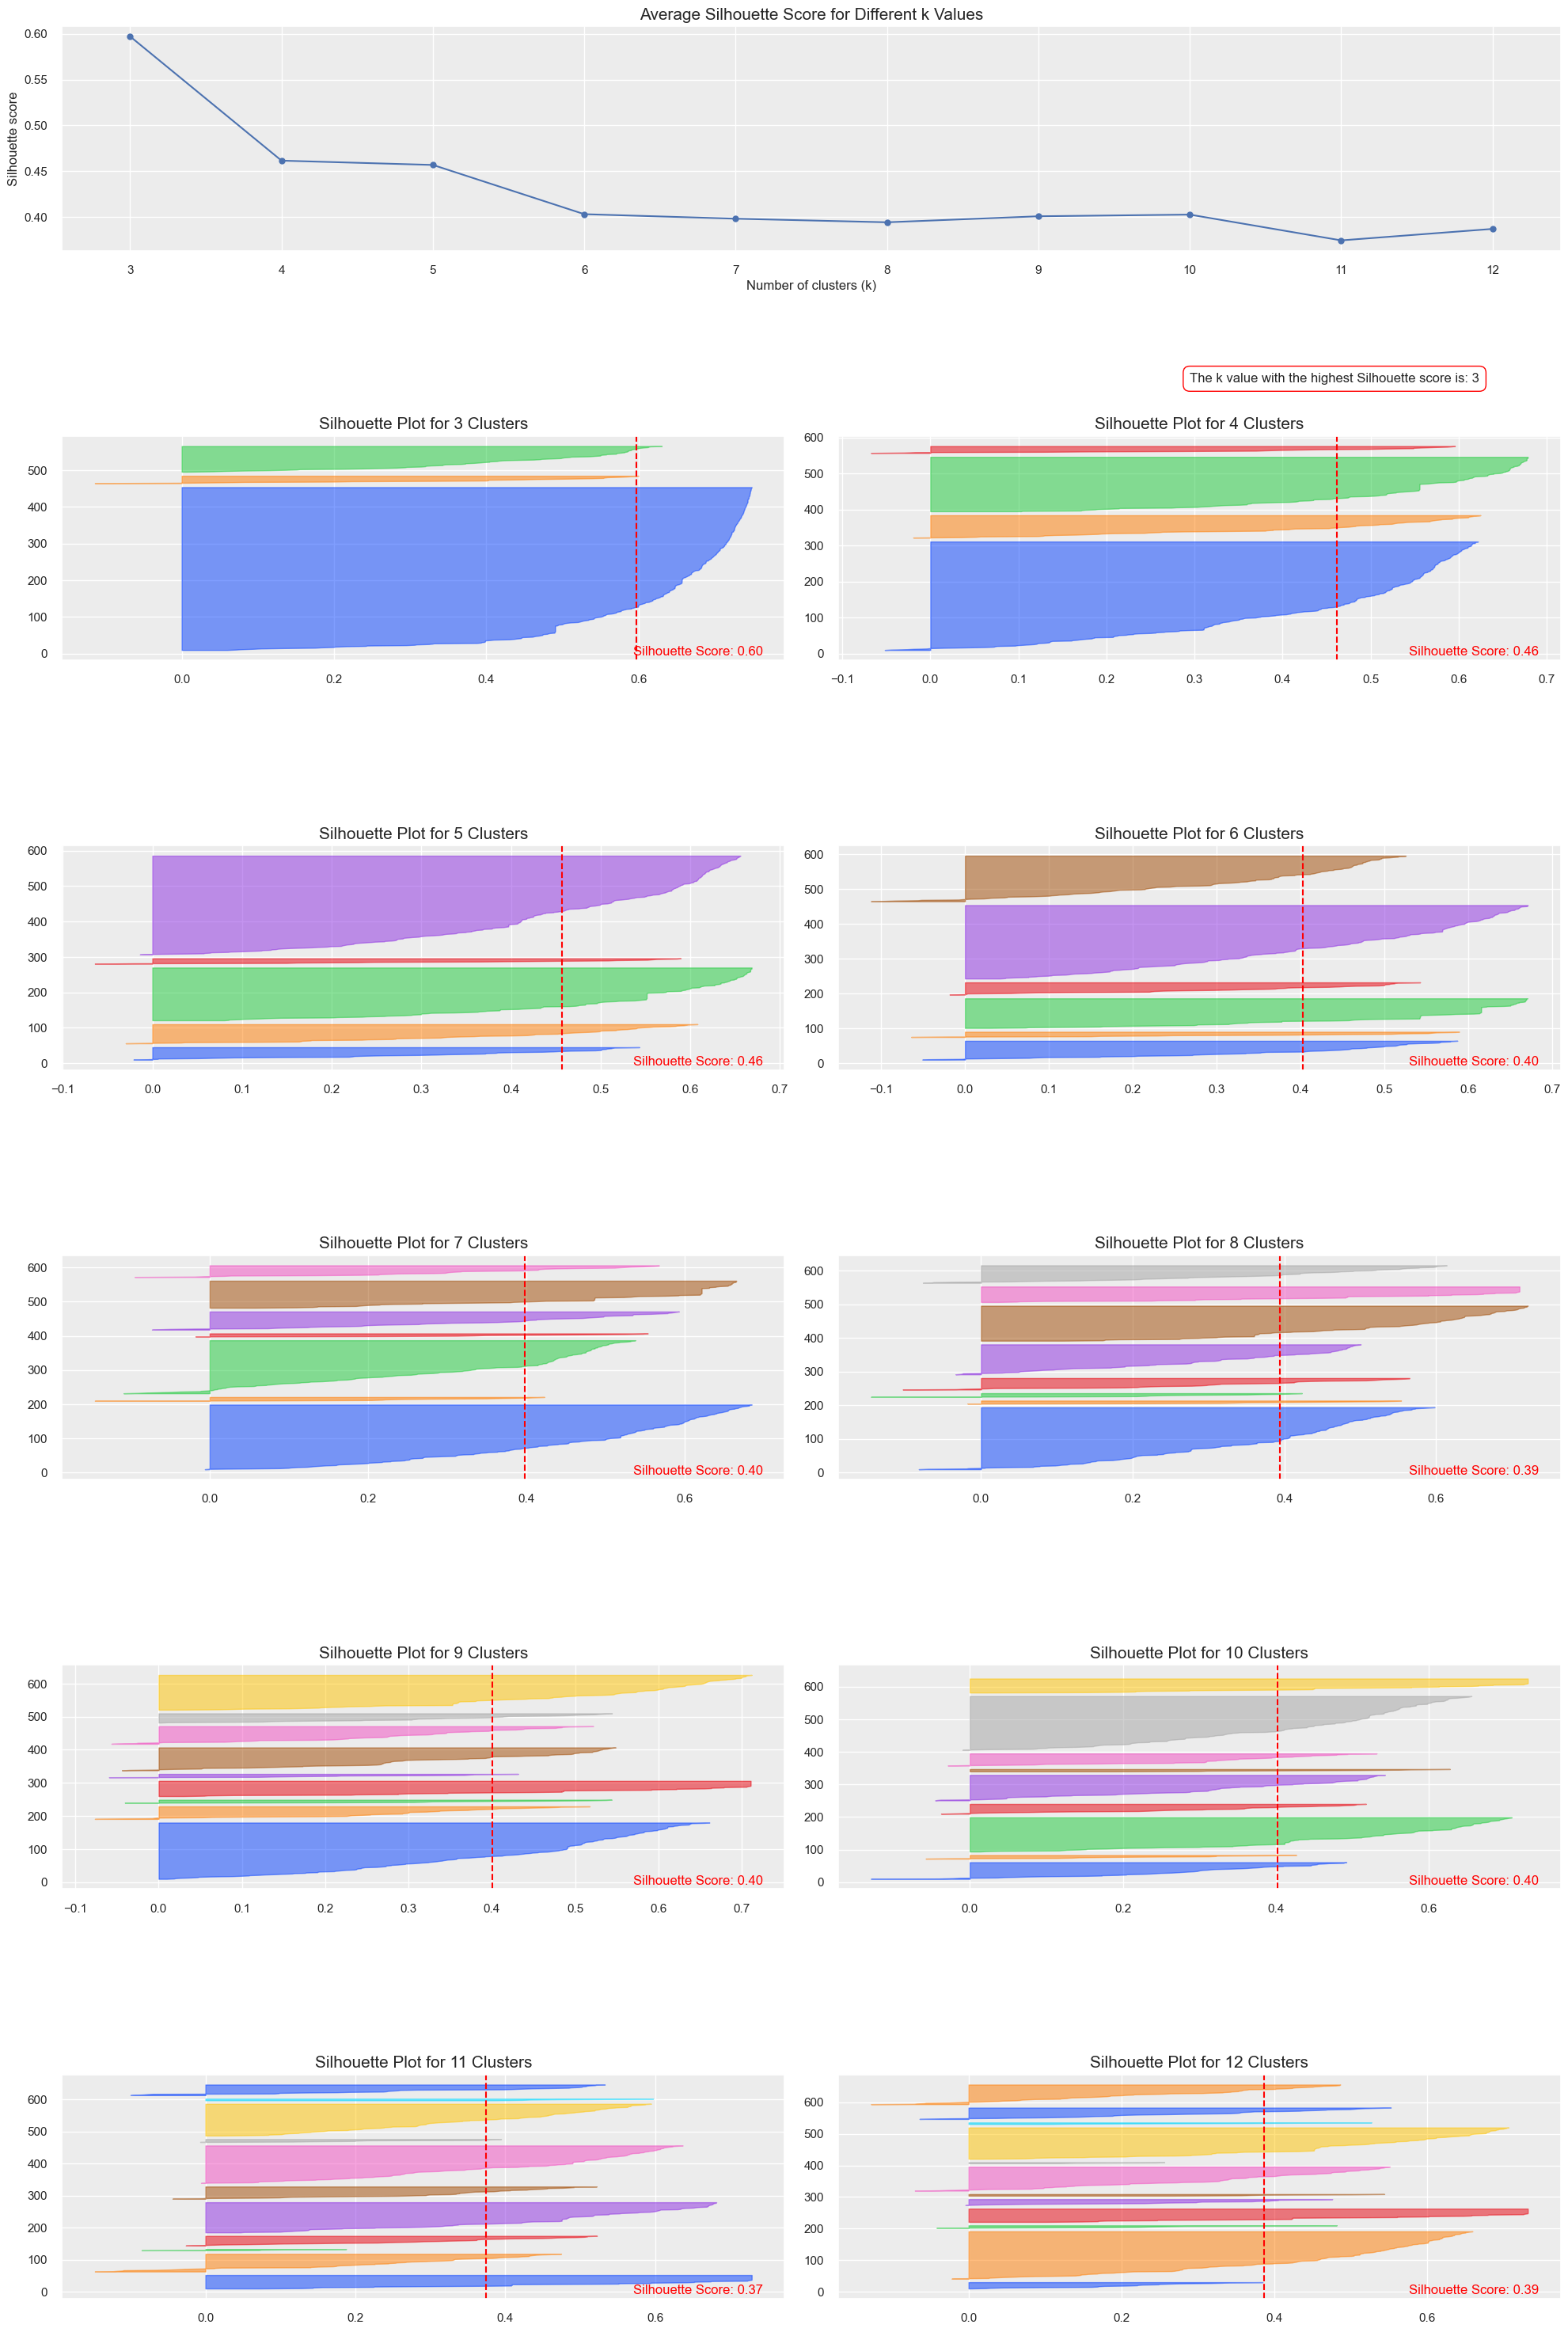

In [44]:
silhouette_analysis(batsman_data_scaled.iloc[:,1:], 3, 12, figsize=(20, 50))

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>After carefully considering the silhouette plots, it's clear that choosing ( <b>k = 4</b> ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.
</p>
</div>

## 9.3: Clustering Model - K-means
<a id="9.3"></a>
 ⬆️[Table Contents](#table_content)

In [45]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(batsman_data_scaled.iloc[:,1:])

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {3: 0, 2: 1, 1: 2, 0: 3}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
batsman_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the Scaled of the dataset
batsman_data_scaled['cluster'] = new_labels

In [46]:
# Display the first few rows of the original dataframe
batsman_data_cleaned.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,cluster
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0,3
1,A Chandila,2,4,7,57.142857,0.0,0.0,1
2,A Chopra,6,53,75,70.666667,0.0,7.0,1
3,A Choudhary,3,25,20,125.000000,1.0,1.0,3
4,A Dananjaya,1,4,5,80.000000,0.0,0.0,1


## 9.4: Evaluation Metrics
<a id="9.4"></a>
 ⬆️[Table Contents](#table_content)

In [47]:
# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned[(batsman_data_cleaned['total_runs'] > 2500) & (batsman_data_cleaned['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster 0:
AB de Villiers
AM Rahane
AT Rayudu
BB McCullum
CH Gayle
DA Warner
G Gambhir
KA Pollard
KD Karthik
MK Pandey
MS Dhoni
PA Patel
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli
YK Pathan
Yuvraj Singh

Cluster 2:
M Vijay
SV Samson
V Sehwag



In [48]:
# Compute number of batsman
num_observations = len(batsman_data_scaled.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled['cluster']

# Compute the metrics
kmeans_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", kmeans_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         537         |
|    Silhouette Score     | 0.46154297343431194 |
| Calinski Harabasz Score |  847.918425215511   |
|  Davies Bouldin Score   |  0.696073794916246  |
+-------------------------+---------------------+


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <h5>Using K-Means Clustering</h5>
    <ul>
        <li>The <b>Silhouette Score</b> of approximately <b>0.461</b>, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.</li>
        <li>The <b>Calinski Harabasz Score</b> is  <b>847.91</b>, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.</li>
        <li>The <b>Davies Bouldin Score</b> of <b>0.69</b> is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.</li>
    </ul>       

</div>

## 9.5: Vizualisation
<a id="9.5"></a>
 ⬆️[Table Contents](#table_content)

### 9.5.1: Radar Chart Approach
<a id="9.5.1"></a>
 ⬆️[Table Contents](#table_content)

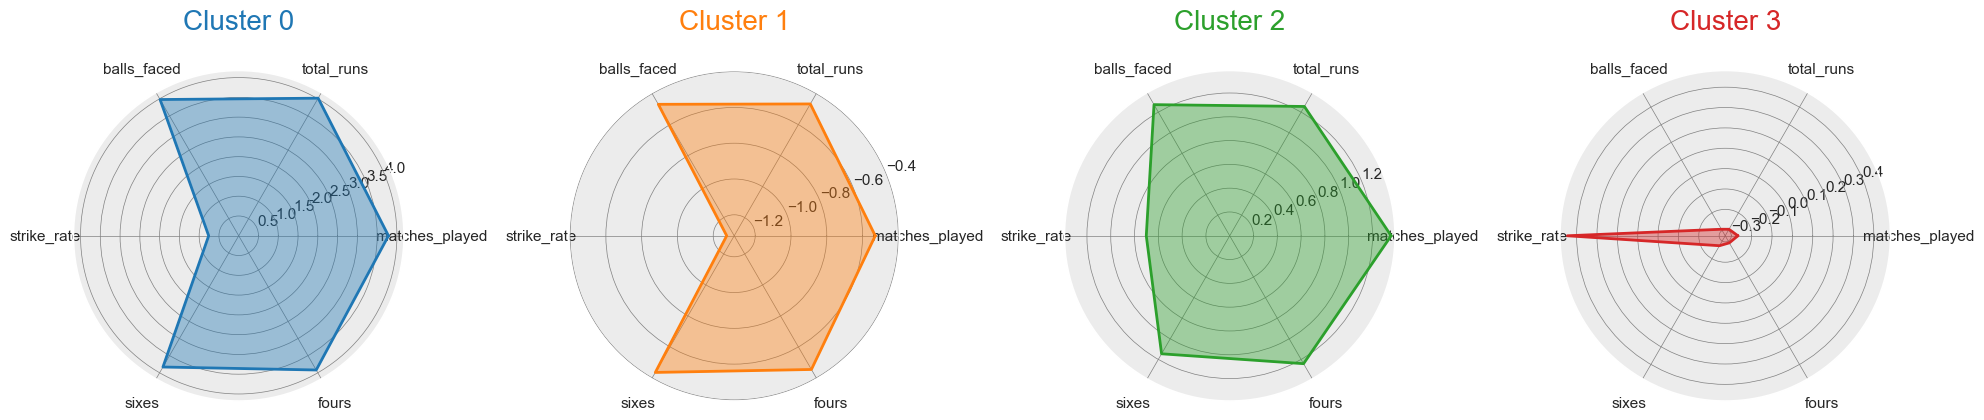

In [49]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


### 9.5.2: Histogram Chart Approach
<a id="9.5.2"></a>
 ⬆️[Table Contents](#table_content)

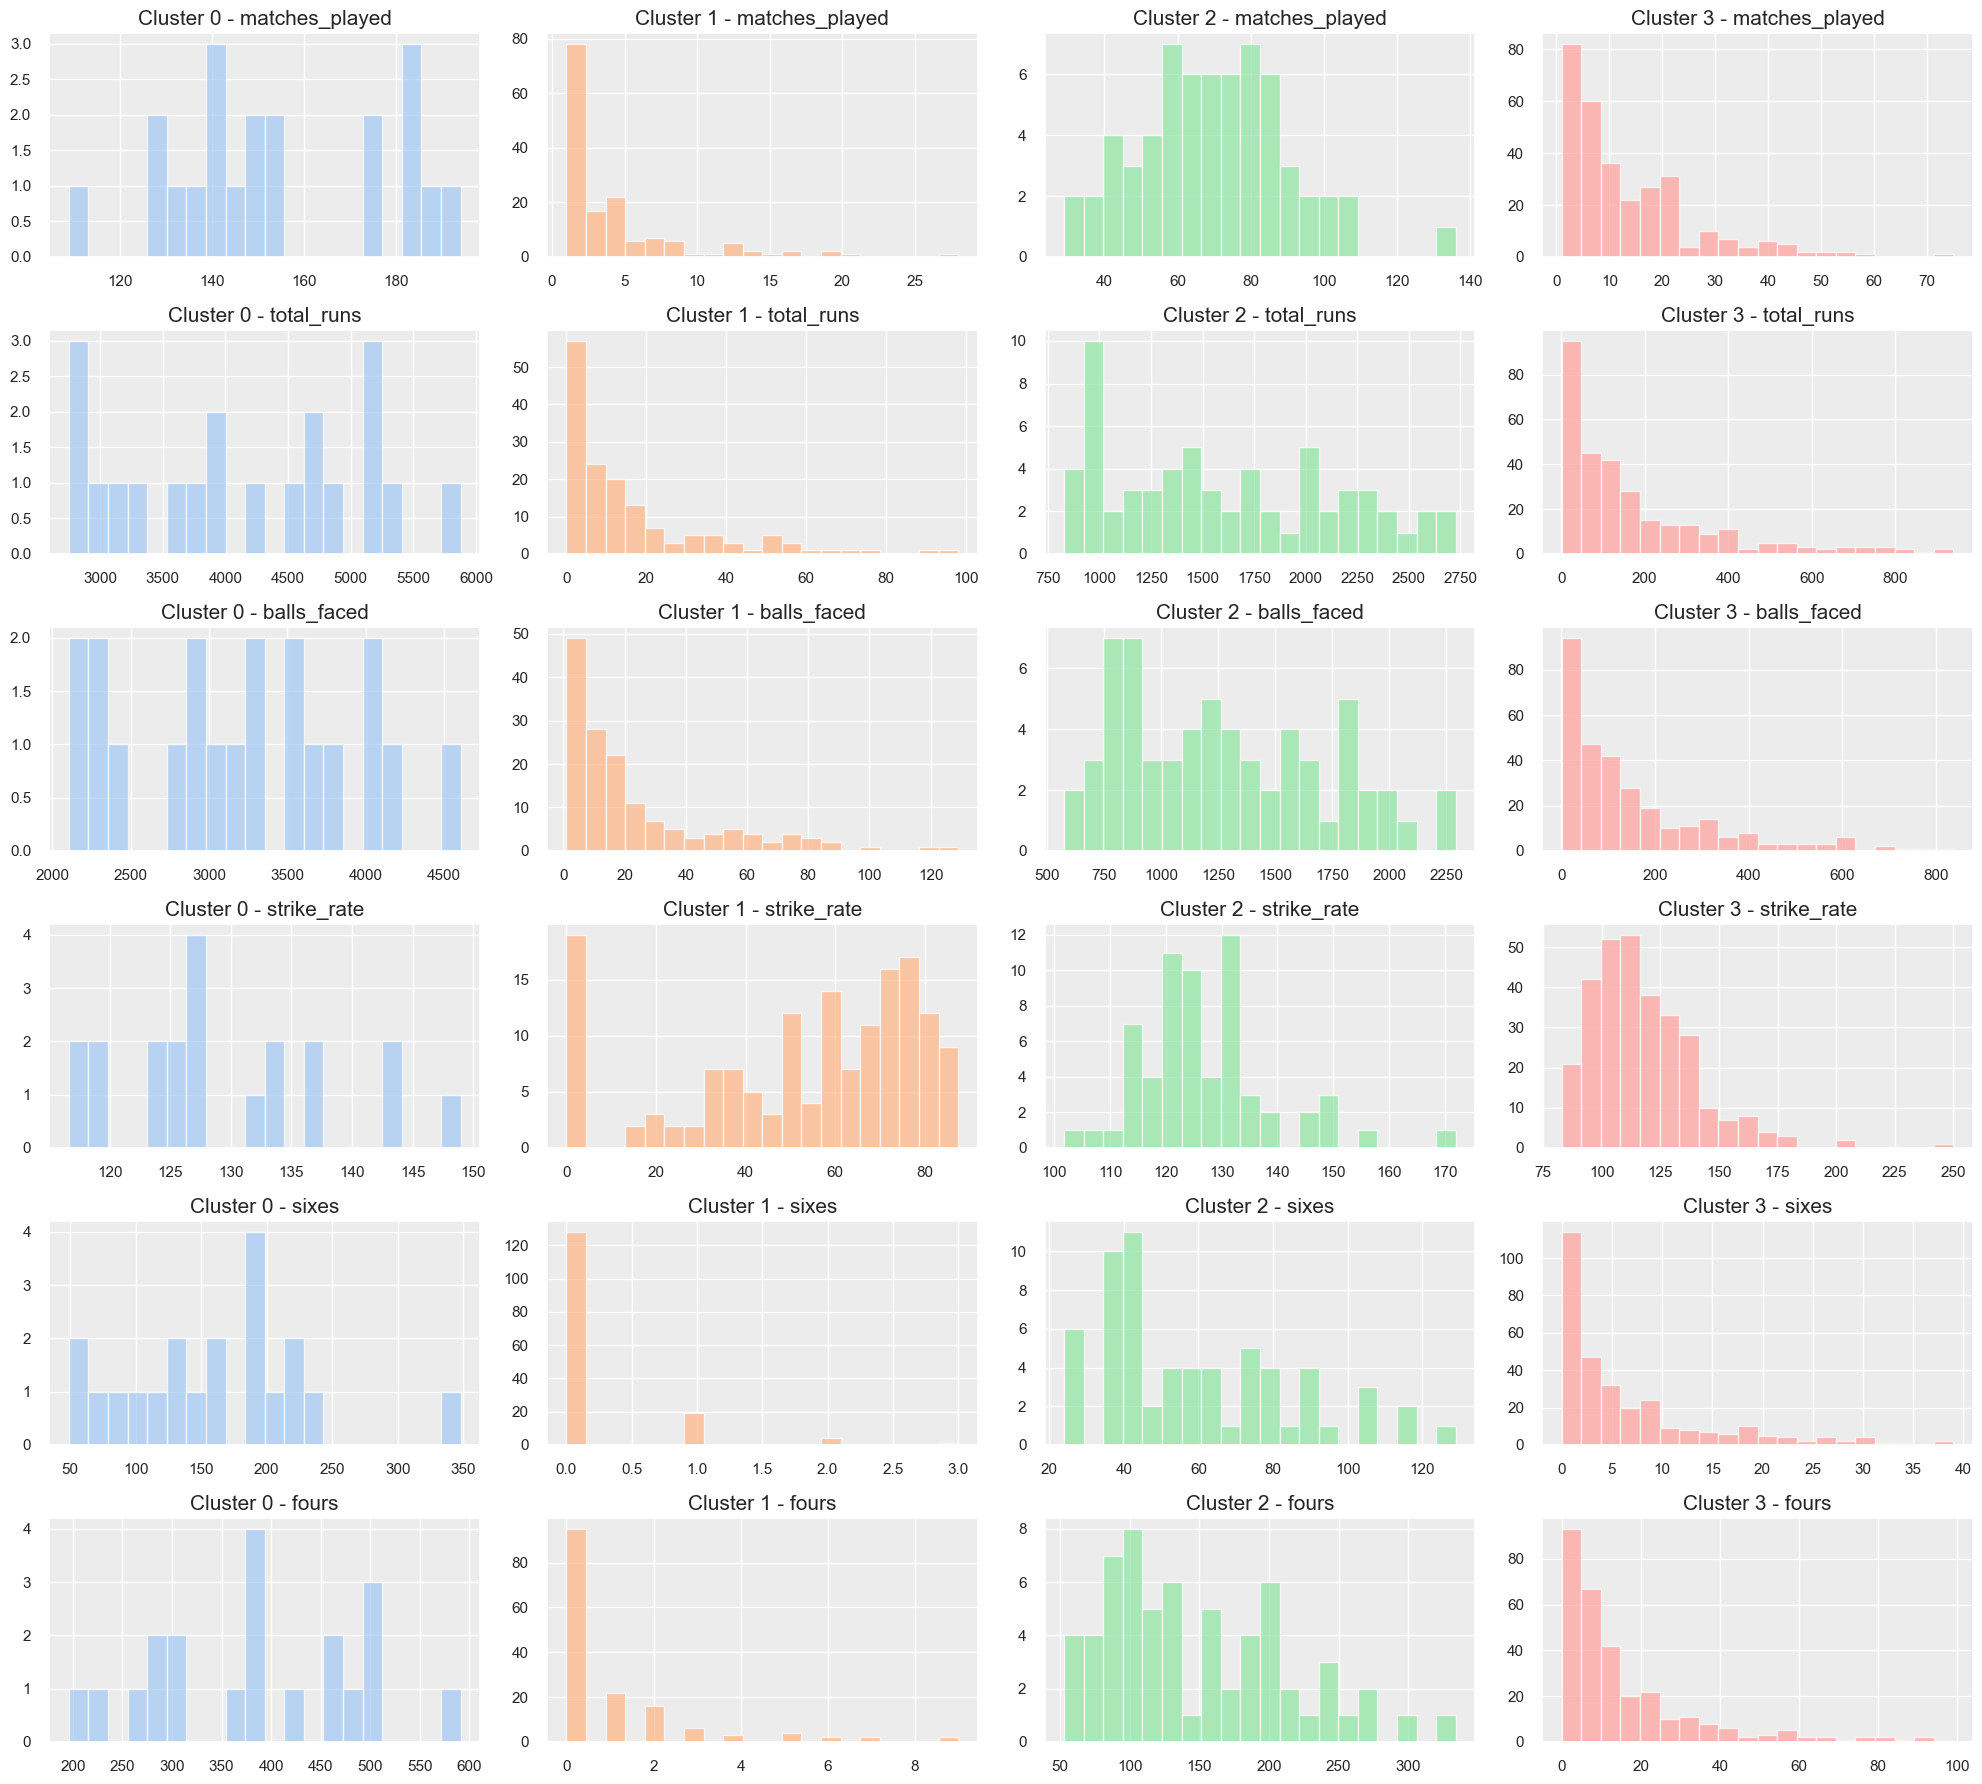

In [50]:
# Plot histograms for each feature segmented by the clusters
features = batsman_data_cleaned.columns[1:-1]
clusters = batsman_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned[batsman_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# 10 : Hierarchical clustering
<a id="10"></a>
 ⬆️[Table Contents](#table_content)

In [51]:
batsman_data_scaled_hie = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_hie = batsman_data_cleaned.drop('cluster',axis=1).copy()

batsman_data_scaled_hie.head()


,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


## 10.1: Dendrogram Plot
<a id="10.1"></a>
 ⬆️[Table Contents](#table_content)

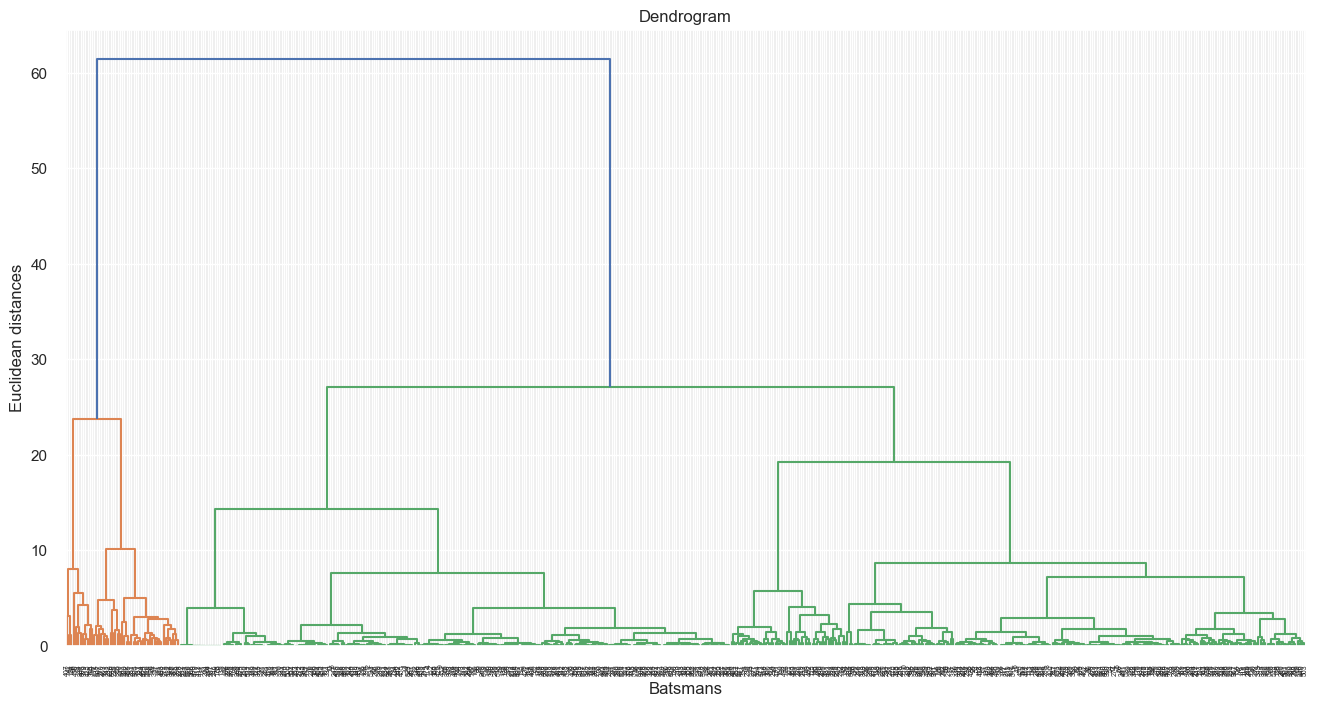

In [52]:
# Let us plot the dendrogram for the batsman dataset after dropping 
# the “batsman” column.


X = batsman_data_scaled_hie.drop(['batsman'], axis=1)

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Batsmans')
plt.ylabel('Euclidean distances')
plt.show()


## 10.2: Clustering Model - Hierarchical 
<a id="10.2"></a>
 ⬆️[Table Contents](#table_content)

In [53]:
## Instantiate Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

## Fit and predict the cluster for each data point
batsman_data_cleaned_hie["cluster"] = agg_cluster.fit_predict(X)
batsman_data_scaled_hie["cluster"] = agg_cluster.fit_predict(X)

In [54]:
batsman_data_scaled_hie["cluster"].nunique()

4

## 10.3: Evaluation Metrics
<a id="10.3"></a>
 ⬆️[Table Contents](#table_content)

In [55]:
#  Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_hie[(batsman_data_cleaned_hie['total_runs'] > 2500) & (batsman_data_cleaned_hie['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster 3:
AB de Villiers
AM Rahane
CH Gayle
DA Warner
G Gambhir
MS Dhoni
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli

Cluster 1:
AT Rayudu
BB McCullum
KA Pollard
KD Karthik
M Vijay
MK Pandey
PA Patel
SV Samson
V Sehwag
YK Pathan
Yuvraj Singh



In [56]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_hie.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_hie.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_hie['cluster']

# Compute the metrics
hierarchical_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", hierarchical_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         537         |
|    Silhouette Score     | 0.38071792004174076 |
| Calinski Harabasz Score |  655.9438724328918  |
|  Davies Bouldin Score   | 0.8174273505528831  |
+-------------------------+---------------------+


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <h5>Using Hierarchical Clustering</h5>
    <ul>
        <li>The <b>Silhouette Score</b> of approximately <b>0.38</b>,highly close to 1, still indicates a small amount of separation between the clusters. It suggests that the clusters are highly distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.</li>
        <li>The <b>Calinski Harabasz Score</b> is  <b>655.94</b>, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.</li>
        <li>The <b>Davies Bouldin Score</b> of <b>0.81</b> is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.</li>
    </ul>       

</div>

## 10.4: Visualization
<a id="10.4"></a>
 ⬆️[Table Contents](#table_content)

### 10.4.1: Radar Chart Approach
<a id="10.4.1"></a>
 ⬆️[Table Contents](#table_content)

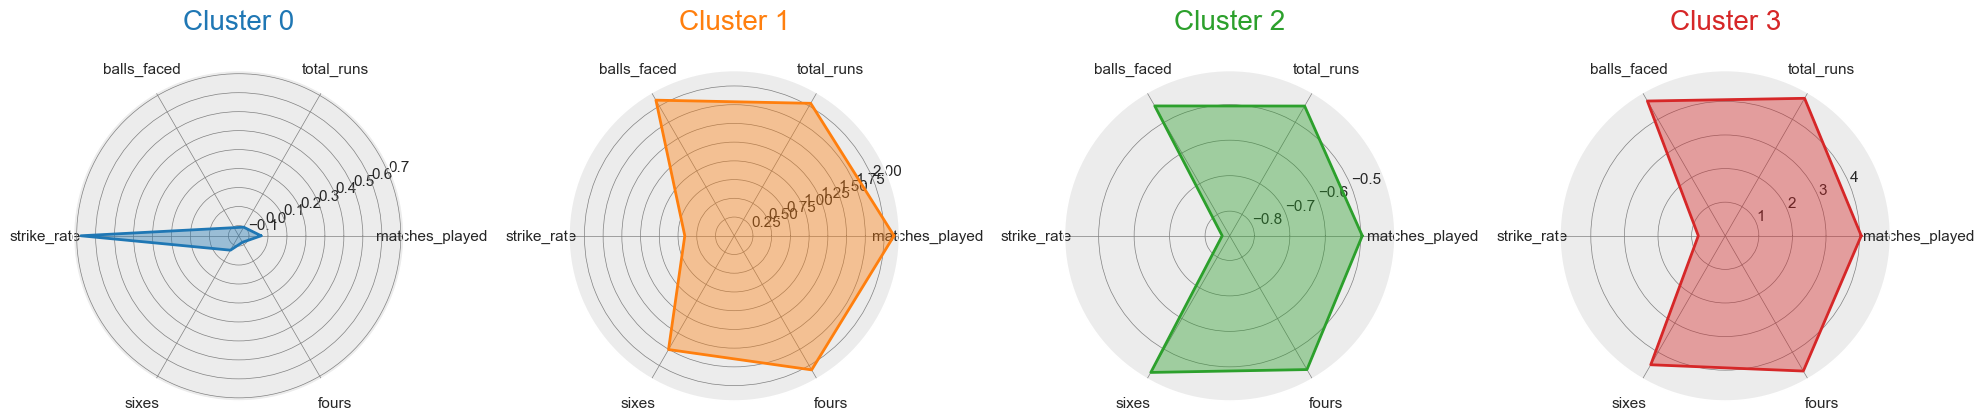

In [57]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned_hie.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


### 10.4.2: Histogram Chart Approach
<a id="10.4.2"></a>
 ⬆️[Table Contents](#table_content)

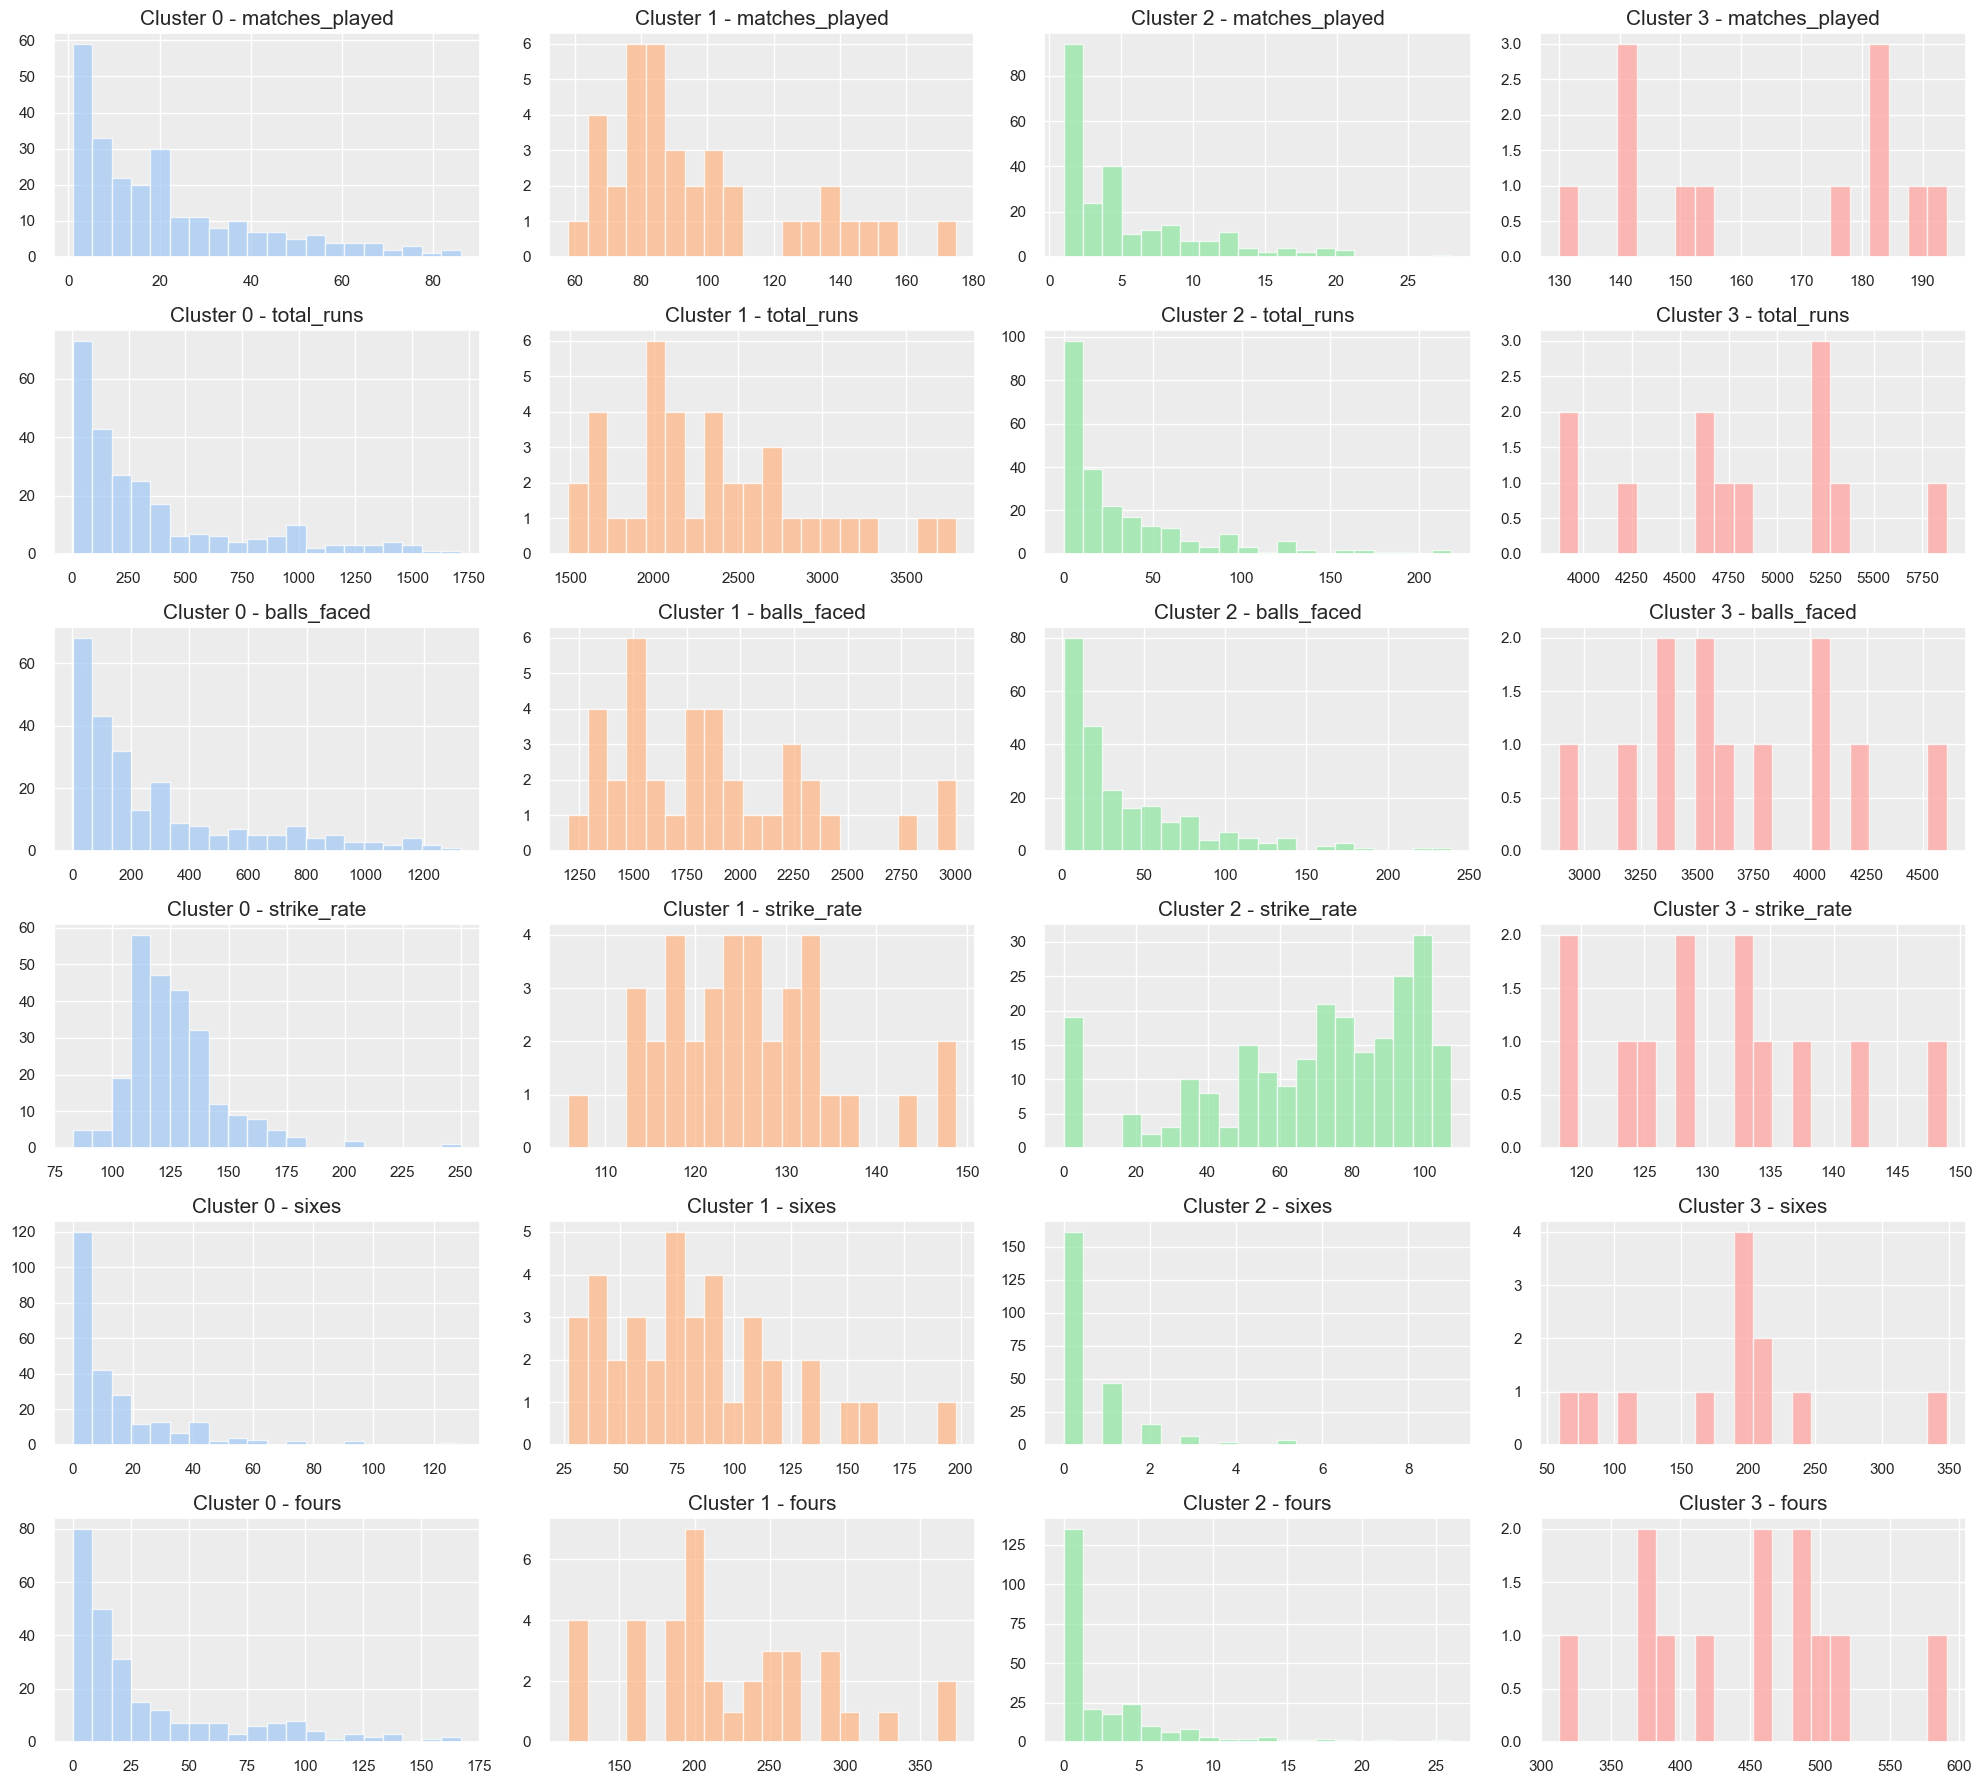

In [58]:
# Plot histograms for each feature segmented by the clusters
features = batsman_data_cleaned_hie.columns[1:-1]
clusters = batsman_data_cleaned_hie['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_hie[batsman_data_cleaned_hie['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# 11: DBSCAN
<a id="11"></a>
 ⬆️[Table Contents](#table_content)

In [59]:
batsman_data_scaled_DBSCAN = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_DBSCAN.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0


In [60]:
batsman_data_scaled_DBSCAN.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


In [61]:
X = batsman_data_scaled_DBSCAN.drop(['batsman'], axis=1)
X.head()

,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


## 11.1: Finding Best Parameters
<a id="11.1"></a>
 ⬆️[Table Contents](#table_content)

In [62]:
# lets find all the nearest neighbours of a given point
neighbors = NearestNeighbors(n_neighbors=20)
# fit the nearest neighbours
neighbors_fit = neighbors.fit(X)
# lets find out the distances
distances, indices = neighbors_fit.kneighbors(X)

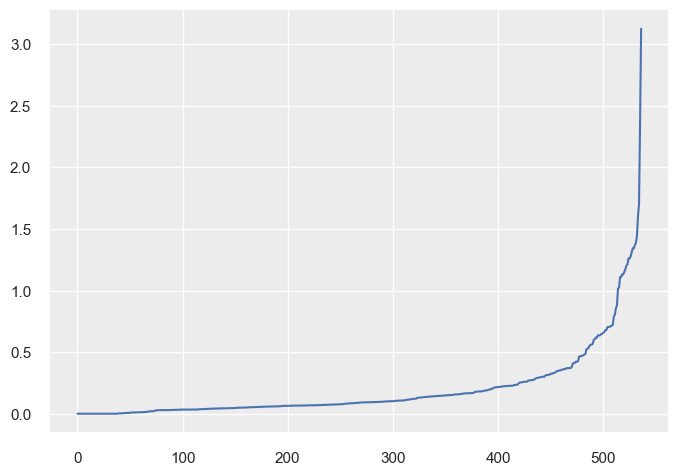

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## 11.2: Clustering Model - DBSCAN 
<a id="11.2"></a>
 ⬆️[Table Contents](#table_content)

In [64]:
# import dbscan
from sklearn.cluster import DBSCAN
# eps=1.4 as suggested by our plot
db = DBSCAN(eps=1.4, min_samples=10).fit(X)
# lets get the labels out
labels = db.labels_

In [65]:
batsman_data_scaled_DBSCAN['cluster'] = labels
batsman_data_cleaned_DBSCAN['cluster'] = labels

In [66]:
batsman_data_scaled_DBSCAN['cluster'].unique()

array([ 0, -1], dtype=int64)

<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <p>the DBSCAN clustering algorithm has identified three clusters, with one cluster(<b> cluster = -1</b>) mainly comprising <b>noise points</b> and the remaining clusters representing groups of batsmen with potentially similar performance attributes. 
</p>
</div>

## 11.3: Evaluation Metrics
<a id="11.3"></a>
 ⬆️[Table Contents](#table_content)

In [67]:
#  Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster -1:
AB de Villiers
AM Rahane
AT Rayudu
CH Gayle
DA Warner
G Gambhir
KA Pollard
KD Karthik
MK Pandey
MS Dhoni
PA Patel
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli
YK Pathan
Yuvraj Singh

Cluster 0:
BB McCullum
M Vijay
SV Samson
V Sehwag



In [68]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_DBSCAN.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_DBSCAN.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_DBSCAN['cluster']

# Compute the metrics
dbscan_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)


# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", dbscan_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        537         |
|    Silhouette Score     | 0.768603088434956  |
| Calinski Harabasz Score | 503.99186733022515 |
|  Davies Bouldin Score   | 0.4228871502368679 |
+-------------------------+--------------------+


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
  <h3>Inference:</h3>
    <h5>Using DBSCAN Clustering</h5>
    <ul>
        <li>The <b>Silhouette Score</b> of approximately <b>0.768</b>, highly to 1, still indicates a high amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.</li>
        <li>The <b>Calinski Harabasz Score</b> is  <b>503.991</b>, which is moderately high, indicating that the clusters are somewhat well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.</li>
        <li>The <b>Davies Bouldin Score</b> of <b>0.422</b> is a reasonable score, indicating a fair level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.</li>
    </ul>       

</div>

## 11.4: Visualization
<a id="11.4"></a>
 ⬆️[Table Contents](#table_content)

### 11.4.1: Radar Chart Approach
<a id="11.4.1"></a>
 ⬆️[Table Contents](#table_content)

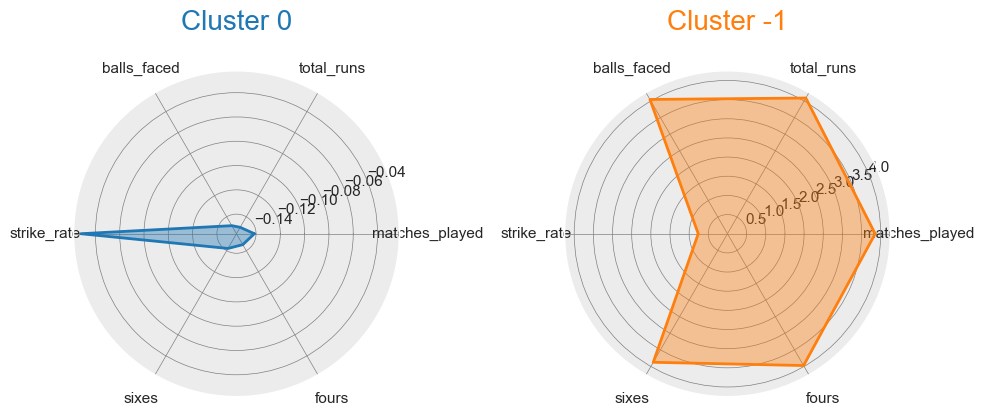

In [69]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned_DBSCAN.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True), nrows=1, ncols=2)

# Create radar chart for each cluster
for i, color in enumerate(['tab:blue', 'tab:orange']): # Adjust colors as needed
    cluster_label = i if i == 0 else -1  # Map cluster index to cluster label
    data = cluster_centroids.loc[cluster_label].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, cluster_label)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Add titles
ax[0].set_title('Cluster 0', color='tab:blue', size=20, y=1.1)
ax[1].set_title('Cluster -1', color='tab:orange', size=20, y=1.1)

# Display the plot
plt.tight_layout()
plt.show()





### 11.4.2: Histogram Chart Approach
<a id="11.4.2"></a>
 ⬆️[Table Contents](#table_content)

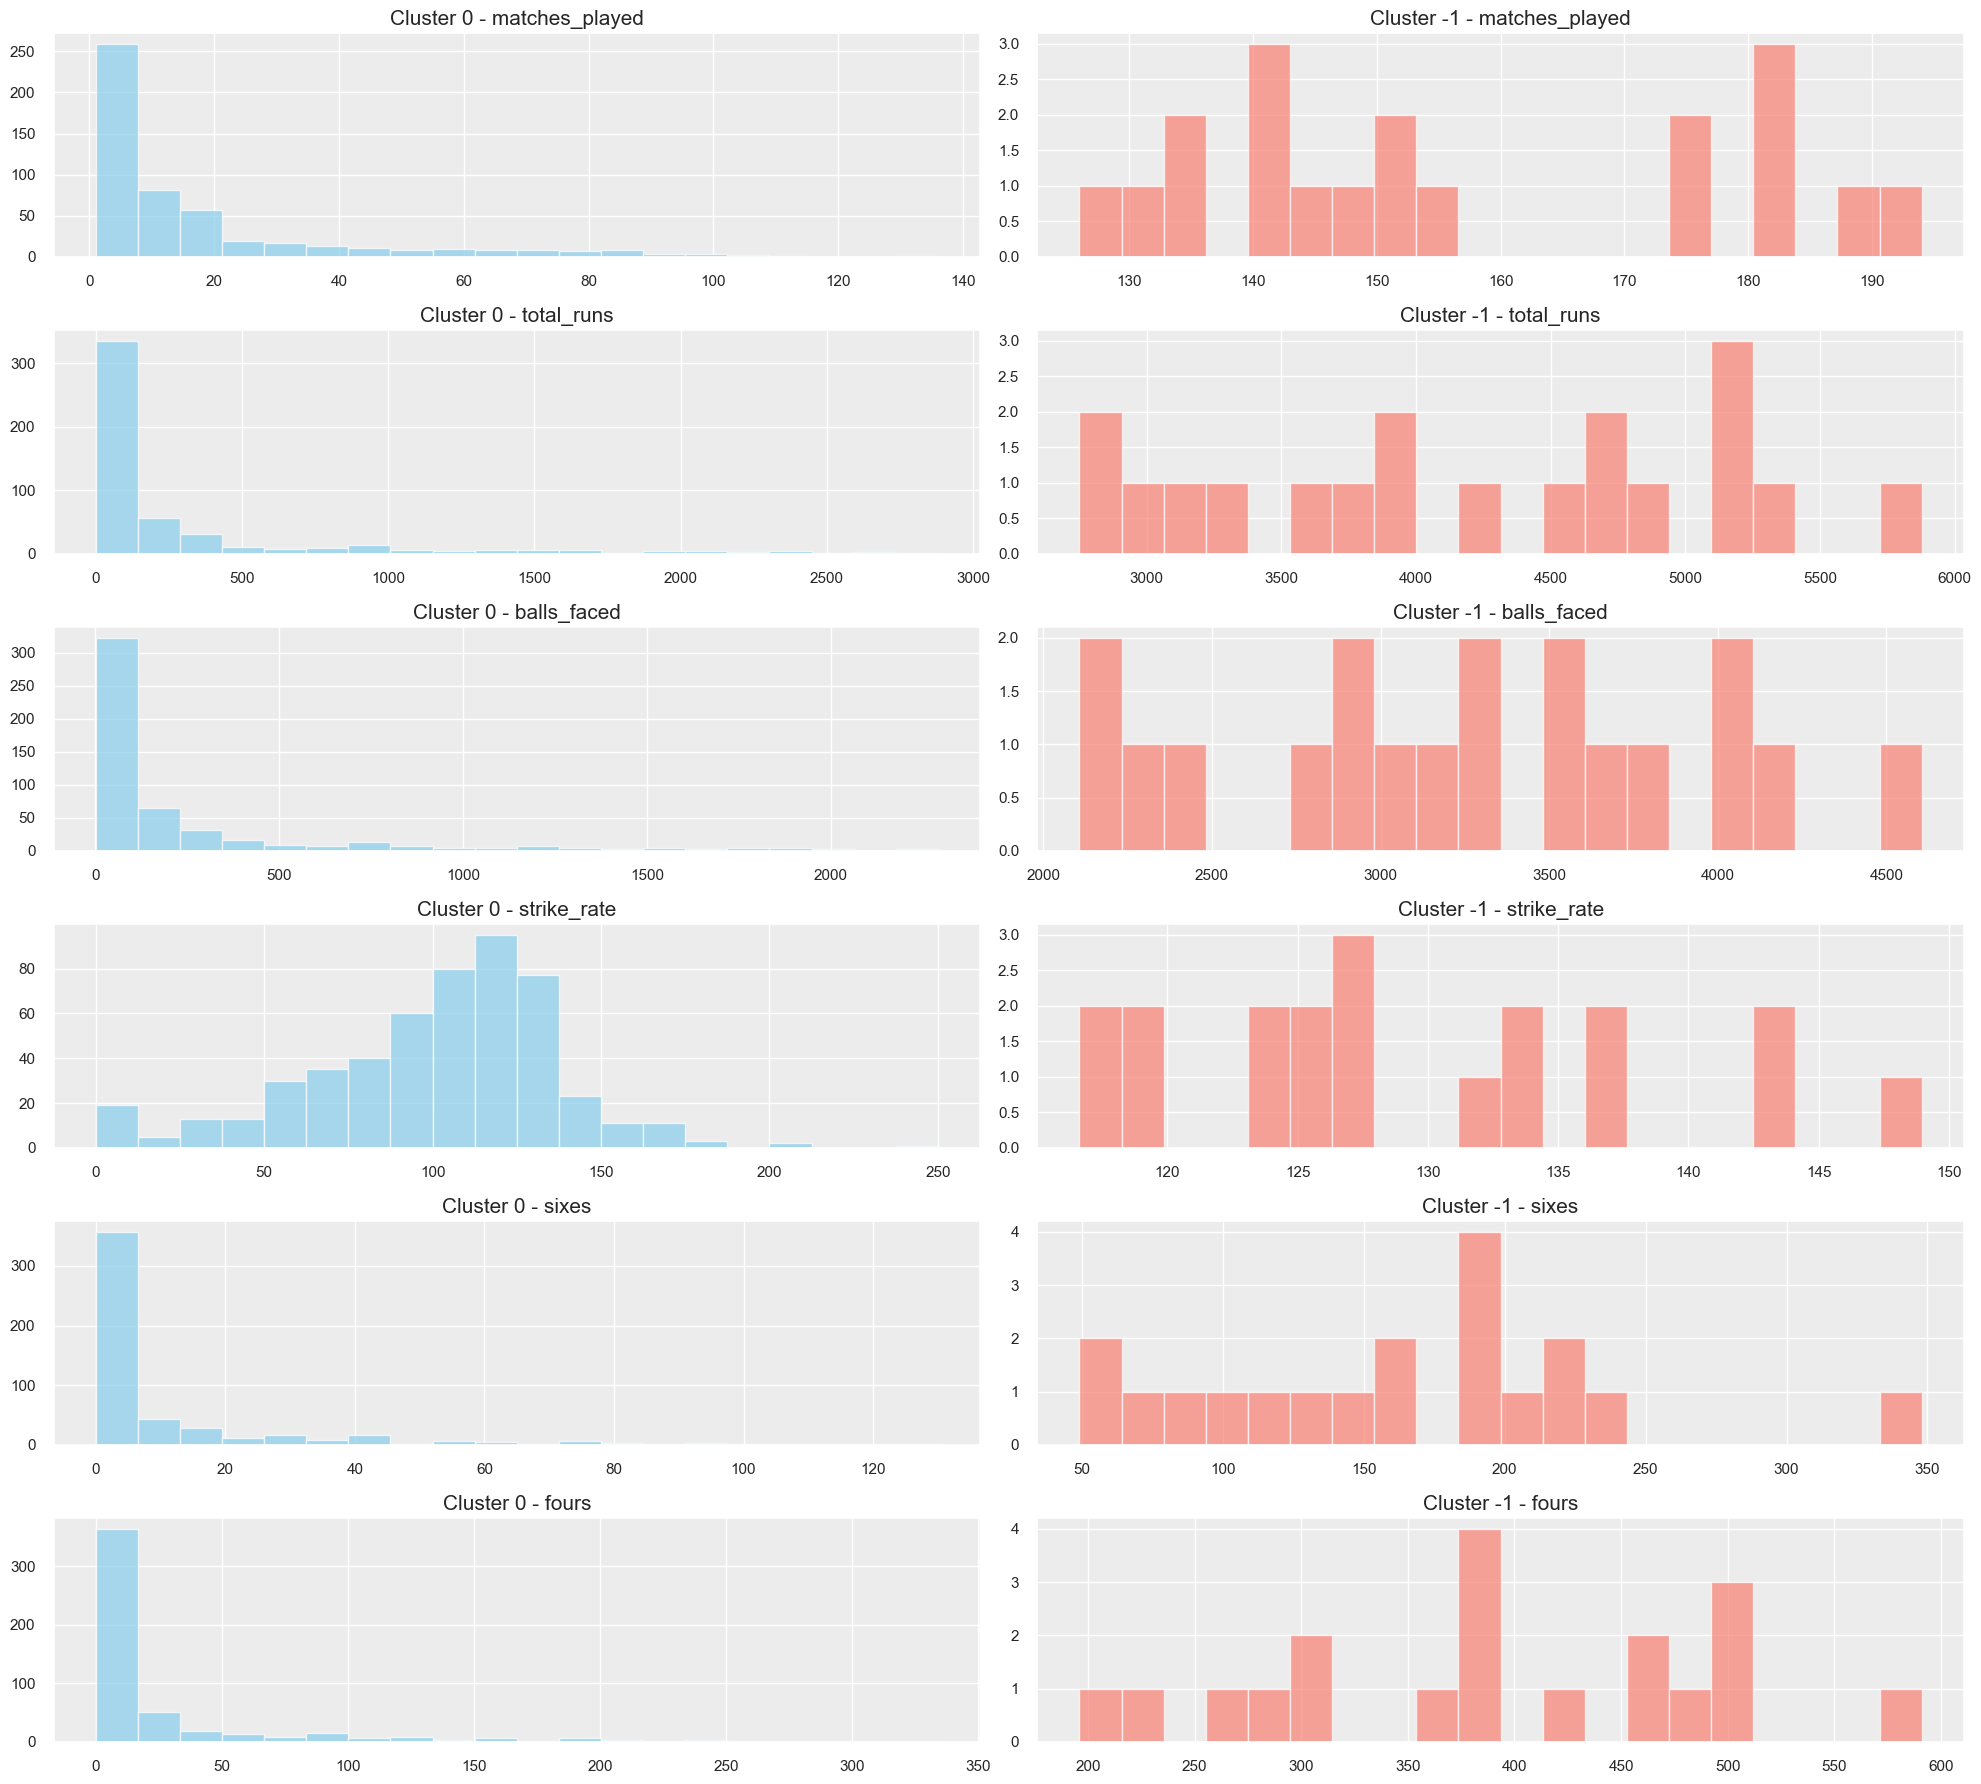

In [70]:
colors = ['skyblue', 'salmon']

# Define features and clusters
features = batsman_data_cleaned_DBSCAN.columns[1:-1]
clusters = [0, -1]

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_DBSCAN[batsman_data_cleaned_DBSCAN['cluster'] == cluster][feature]
        if n_rows > 1:
            ax = axes[i, j]
        else:
            ax = axes[j]
        ax.hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

# 12: Conclusion
<a id="12"></a>
 ⬆️[Table Contents](#table_content)

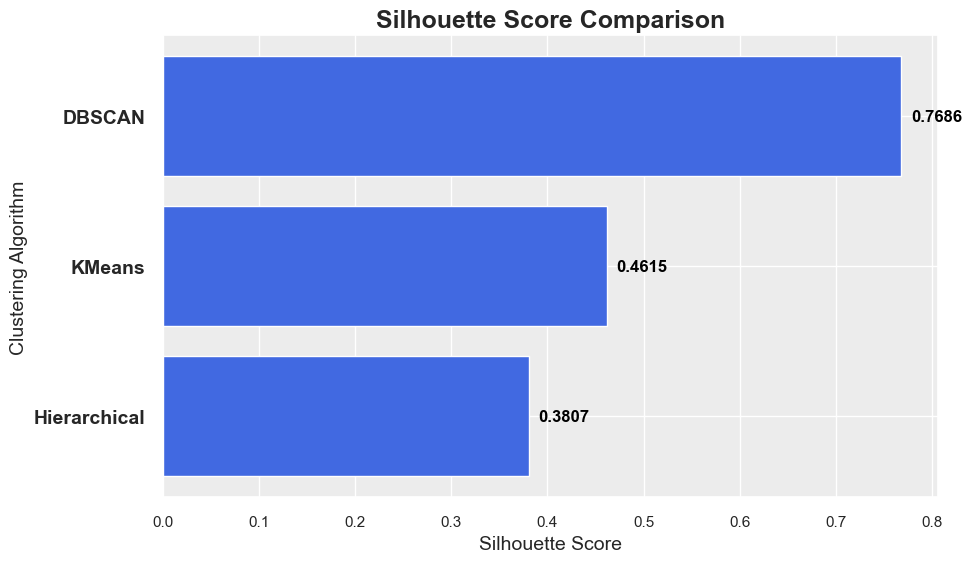

In [71]:
# Define the silhouette scores obtained from different clustering algorithms
silhouette_scores = {
    "KMeans": kmeans_silhouette_score,
    "Hierarchical": hierarchical_silhouette_score,
    "DBSCAN": dbscan_silhouette_score
}

# Convert silhouette scores to DataFrame for easier plotting
silhouette_df = pd.DataFrame.from_dict(silhouette_scores, orient='index', columns=['Silhouette Score'])

# Sort silhouette scores for better visualization
silhouette_df.sort_values(by='Silhouette Score', ascending=False, inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(silhouette_df)), silhouette_df['Silhouette Score'], color='royalblue')

# Annotate the values outside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, i, f'{width:.4f}', ha='left', va='center', fontweight='bold', color='black')

# Set y-axis labels and make them bold
ax.set_yticks(range(len(silhouette_df)))
ax.set_yticklabels(silhouette_df.index, fontsize=14, fontweight='bold')
ax.set_ylabel('Clustering Algorithm', fontsize=14)
# Set x-axis label
ax.set_xlabel('Silhouette Score', fontsize=14)

# Add title
plt.title("Silhouette Score Comparison", fontweight='bold', fontsize=18)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

plt.show()


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
    
<p>Among all the tested clustering Algorithms, <b>DBSCAN Clustering</b> had the best performance in clustering Batsman:</p>

🏆 <b>Silhouette Score</b> = 0.7686<br>

🏆 <b>Calinski Harabasz Score </b>= 503.991<br>

🏆 <b>Davies Bouldin Score </b>= 0.422<br>


</div>

## Batsmen with 100+ matches and 2500+ runs

In [77]:
# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Selecting desired columns
filtered_data_with_clusters = filtered_data[batsman_data_cleaned_DBSCAN.columns]


filtered_data_with_clusters.sort_values('total_runs', ascending=False).reset_index()

,index,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,cluster
0,505,V Kohli,183,5877,4605,127.622150,202.0,504.0,-1
1,438,SK Raina,189,5368,4041,132.838406,194.0,493.0,-1
2,116,DA Warner,141,5235,3809,137.437648,193.0,509.0,-1
3,379,RG Sharma,194,5230,4088,127.935421,214.0,458.0,-1
4,407,S Dhawan,175,5197,4208,123.502852,109.0,591.0,-1
5,24,AB de Villiers,155,4792,3217,148.958657,234.0,381.0,-1
6,96,CH Gayle,130,4762,3338,142.660276,348.0,383.0,-1
7,301,MS Dhoni,182,4632,3493,132.608073,216.0,313.0,-1
8,398,RV Uthappa,182,4607,3658,125.943138,163.0,454.0,-1
9,154,G Gambhir,151,4217,3524,119.665153,59.0,492.0,-1


<div style="background-color: Green; padding: 15px; border-radius: 10px; border: 2px solid #4d94ff;">
    
<h2>Insights on Clusters</h2>

<h3>Cluster -1:</h3>
<ul>
  <li>This cluster consists of batsmen who have played a significant number of matches with high total runs scored.</li>
  <li>They have faced a considerable number of balls, indicating their involvement and longevity in innings.</li>
  <li>The strike rates of these batsmen vary but generally fall within a competitive range, suggesting effectiveness in scoring runs.</li>
  <li>There is a notable presence of boundary hitters in this cluster, as indicated by the number of sixes and fours.</li>
  <li>Batsmen in this cluster include prolific run-scorers like Virat Kohli, Suresh Raina, David Warner, Rohit Sharma, and AB de Villiers, among others.</li>
  <li>These batsmen have consistently performed well over multiple seasons and are key players in their respective teams.</li>
</ul>

<h3>Cluster 0:</h3>
<ul>
  <li>This cluster consists of batsmen with relatively fewer matches played and lower total runs compared to Cluster -1.</li>
  <li>While their total runs are lower, their strike rates vary, with some batsmen having comparable or even higher strike rates than those in Cluster -1.</li>
  <li>There is a mix of experienced players like Brendon McCullum and Virender Sehwag alongside younger talents like Sanju Samson and Murali Vijay.</li>
  <li>Batsmen in this cluster may have had periods of explosive performances but may not have sustained consistency or played as many matches as those in Cluster -1.</li>
</ul>
</div>

In [78]:
file_path = "ipl_top_batsmen_stats 2008-2020.csv"

# Save the DataFrame to CSV
filtered_data_with_clusters.to_csv(file_path, index=False)

print("DataFrame successfully saved to csv file:", file_path)

DataFrame successfully saved to csv file: ipl_top_batsmen_stats 2008-2020.csv
